<a href="https://colab.research.google.com/github/amit-raj-repo/ML-Decision-Tree-Python/blob/master/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Data/data.csv").dropna(axis = 0)
df.head()

In [0]:
#Seprating dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [7]:
print(X.shape)

(169559, 25)


In [0]:
#Splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=3)

In [0]:
#===============================================================#
# Decision Tree Algorithm
#===============================================================#

In [0]:
model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 100,
                               random_state = 3, min_samples_leaf = 50)

In [11]:
#Fitting the Model
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

In [0]:
#Getting the predictions
pred = model.predict(X_test)
predProb = model.predict_proba(X_test)

In [14]:
#Checking the accuracy
print(metrics.accuracy_score(y_test, pred))

0.9417610285444681


In [15]:
#Checking the confusion metrics
print(confusion_matrix(y_test, pred))

[[25420   490]
 [ 1485  6517]]


In [0]:
# Getting values for FPR and TPR
fpr, tpr, threshold = metrics.roc_curve(y_test, predProb[:,1])
roc_auc = metrics.auc(fpr, tpr)

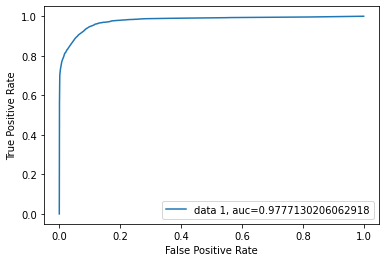

In [19]:
# ROC Curve
plt.plot(fpr,tpr,label="data 1, auc="+str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()